In [1]:
library(Seurat)

Registered S3 method overwritten by 'spatstat.core':
  method          from
  formula.glmmPQL MASS

Attaching SeuratObject

Attaching sp



# 0. Load data

In [2]:
dataobj <- readRDS("sampled.raw.rds")

In [4]:
dataobj <- FindVariableFeatures(dataobj,nfeatures = 2000)
dataobj <- ScaleData(dataobj)

Centering and scaling data matrix



In [5]:
dataobj <- RunPCA(dataobj)

PC_ 1 
Positive:  NEGR1, PID1, ACSM3, EBF1, ABCA8, ABCA6, ADGRB3, CDH19, GRK5, CARMIL1 
	   SPOCK1, BICC1, ABCA9, ANKRD1, PTPRS, LGR4, TRPS1, FOXP2, GLIS3, BNC2 
	   UNC5C, AKT3, MAMDC2, ABI3BP, TTTY14, GAS7, EBF2, NCAM2, LINC01088, MGST1 
Negative:  RPL18A, RPL39, RPL9, RPS27, RPS18, RPS28, TMSB10, RPL3, RPS15A, FKBP1A 
	   RPL32, RPL21, RPL34, IFITM2, RPS19, RPS3A, PTMA, RPS15, EEF1A1, RPL12 
	   RPL19, TMSB4X, RPS27A, RPS14, RPL36, RPL35A, RPL41, RPL28, FAU, IFI27 
PC_ 2 
Positive:  ABCA6, NEGR1, PID1, FBN1, EBF1, DCN, MGST1, BICC1, GLIS3, ACSM3 
	   CDH19, ABCA8, DCLK1, ABCA9, COL6A3, ABCA10, AKT3, COL4A4, TFPI, CFH 
	   TSHZ2, EGFR, ADH1B, EBF2, VIT, NNMT, ADGRB3, SMIM6, SCN7A, KAZN 
Negative:  ANKRD1, HSPB7, NRAP, TCAP, STYXL2, TPM2, MYL3, CPNE5, CKM, MYL2 
	   CSRP3, FABP3, NMRK2, ACTA1, HSPB3, PYGB, FLNC, MYL7, CRYAB, MYL9 
	   COX6A2, PTP4A3, EEF1A2, PERM1, XIRP1, ESRRA, PGAM2, GADD45G, AGBL4, SYNM 
PC_ 3 
Positive:  HCST, TYROBP, FCER1G, CORO1A, LAPTM5, ITGB2, FCGR3A, PTPRC, 

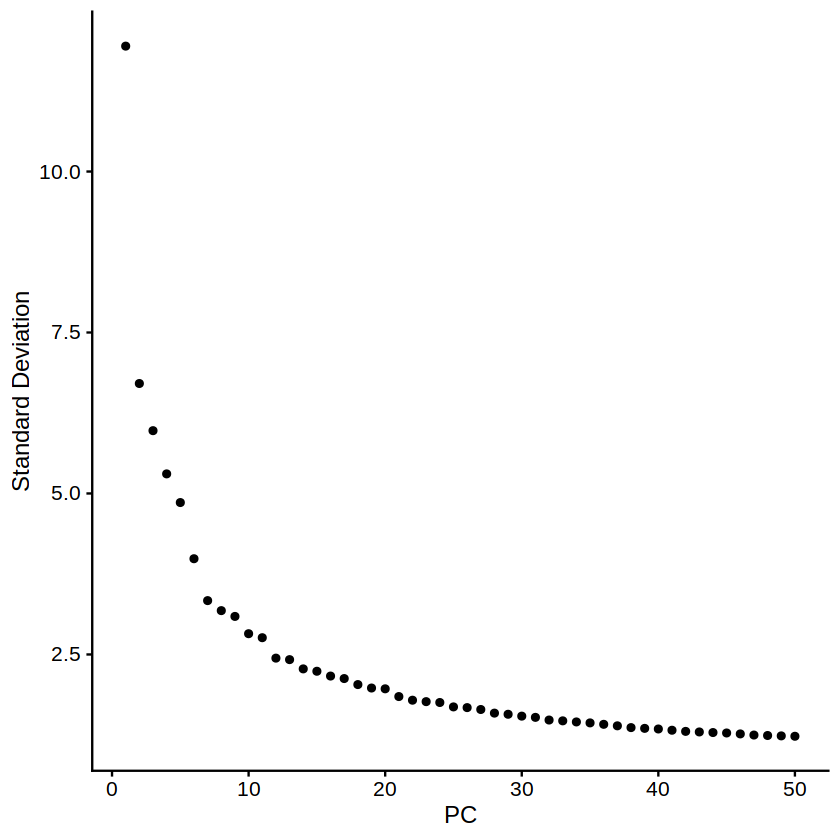

In [8]:
ElbowPlot(dataobj, ndims = 50)

# 1. Harmony

In [6]:
library(harmony)

Loading required package: Rcpp



In [15]:
start.time <- Sys.time()

dataobj <- RunHarmony(dataobj,dims.use = 1:40, group.by.vars="Ref",max.iter.harmony=50)

Sys.time() - start.time

Harmony 1/50

Harmony 2/50

Harmony 3/50

Harmony 4/50

Harmony 5/50

Harmony 6/50

Harmony 7/50

Harmony converged after 7 iterations

Warning message:
“Invalid name supplied, making object name syntactically valid. New object name is Seurat..ProjectDim.RNA.harmony; see ?make.names for more details on syntax validity”


Time difference of 6.071451 mins

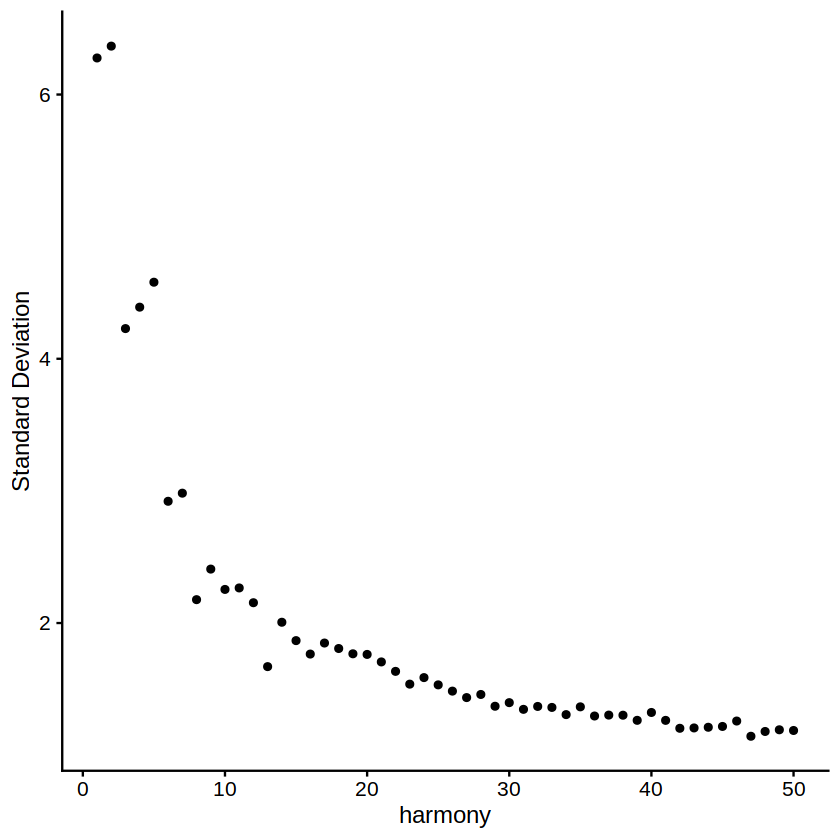

In [17]:
ElbowPlot(dataobj,reduction = "harmony",ndims = 50)

## Visualization

In [18]:
dataobj <- RunUMAP(dataobj,reduction="harmony",dims=1:40, reduction.key = "UMAP_harmony")

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
16:08:26 UMAP embedding parameters a = 0.9922 b = 1.112

16:08:26 Read 99567 rows and found 40 numeric columns

16:08:26 Using Annoy for neighbor search, n_neighbors = 30

16:08:26 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

16:08:38 Writing NN index file to temp file /tmp/RtmpTTf9x0/file15efe536c2d6c

16:08:38 Searching Annoy index using 1 thread, search_k = 3000

16:09:17 Annoy recall = 100%

16:09:17 Commencing smooth kNN distance calibration using 1 thread

16:09:21 Initializing f

In [20]:
dataobj@reductions

$pca
A dimensional reduction object with key PC_ 
 Number of dimensions: 50 
 Projected dimensional reduction calculated:  FALSE 
 Jackstraw run: FALSE 
 Computed using assay: RNA 

$tsne
A dimensional reduction object with key tSNE_ 
 Number of dimensions: 2 
 Projected dimensional reduction calculated:  FALSE 
 Jackstraw run: FALSE 
 Computed using assay: RNA 

$umap
A dimensional reduction object with key UMAPharmony_ 
 Number of dimensions: 2 
 Projected dimensional reduction calculated:  FALSE 
 Jackstraw run: FALSE 
 Computed using assay: RNA 

$harmony
A dimensional reduction object with key harmony_ 
 Number of dimensions: 50 
 Projected dimensional reduction calculated:  TRUE 
 Jackstraw run: FALSE 
 Computed using assay: RNA 


In [30]:
library(ggplot2)

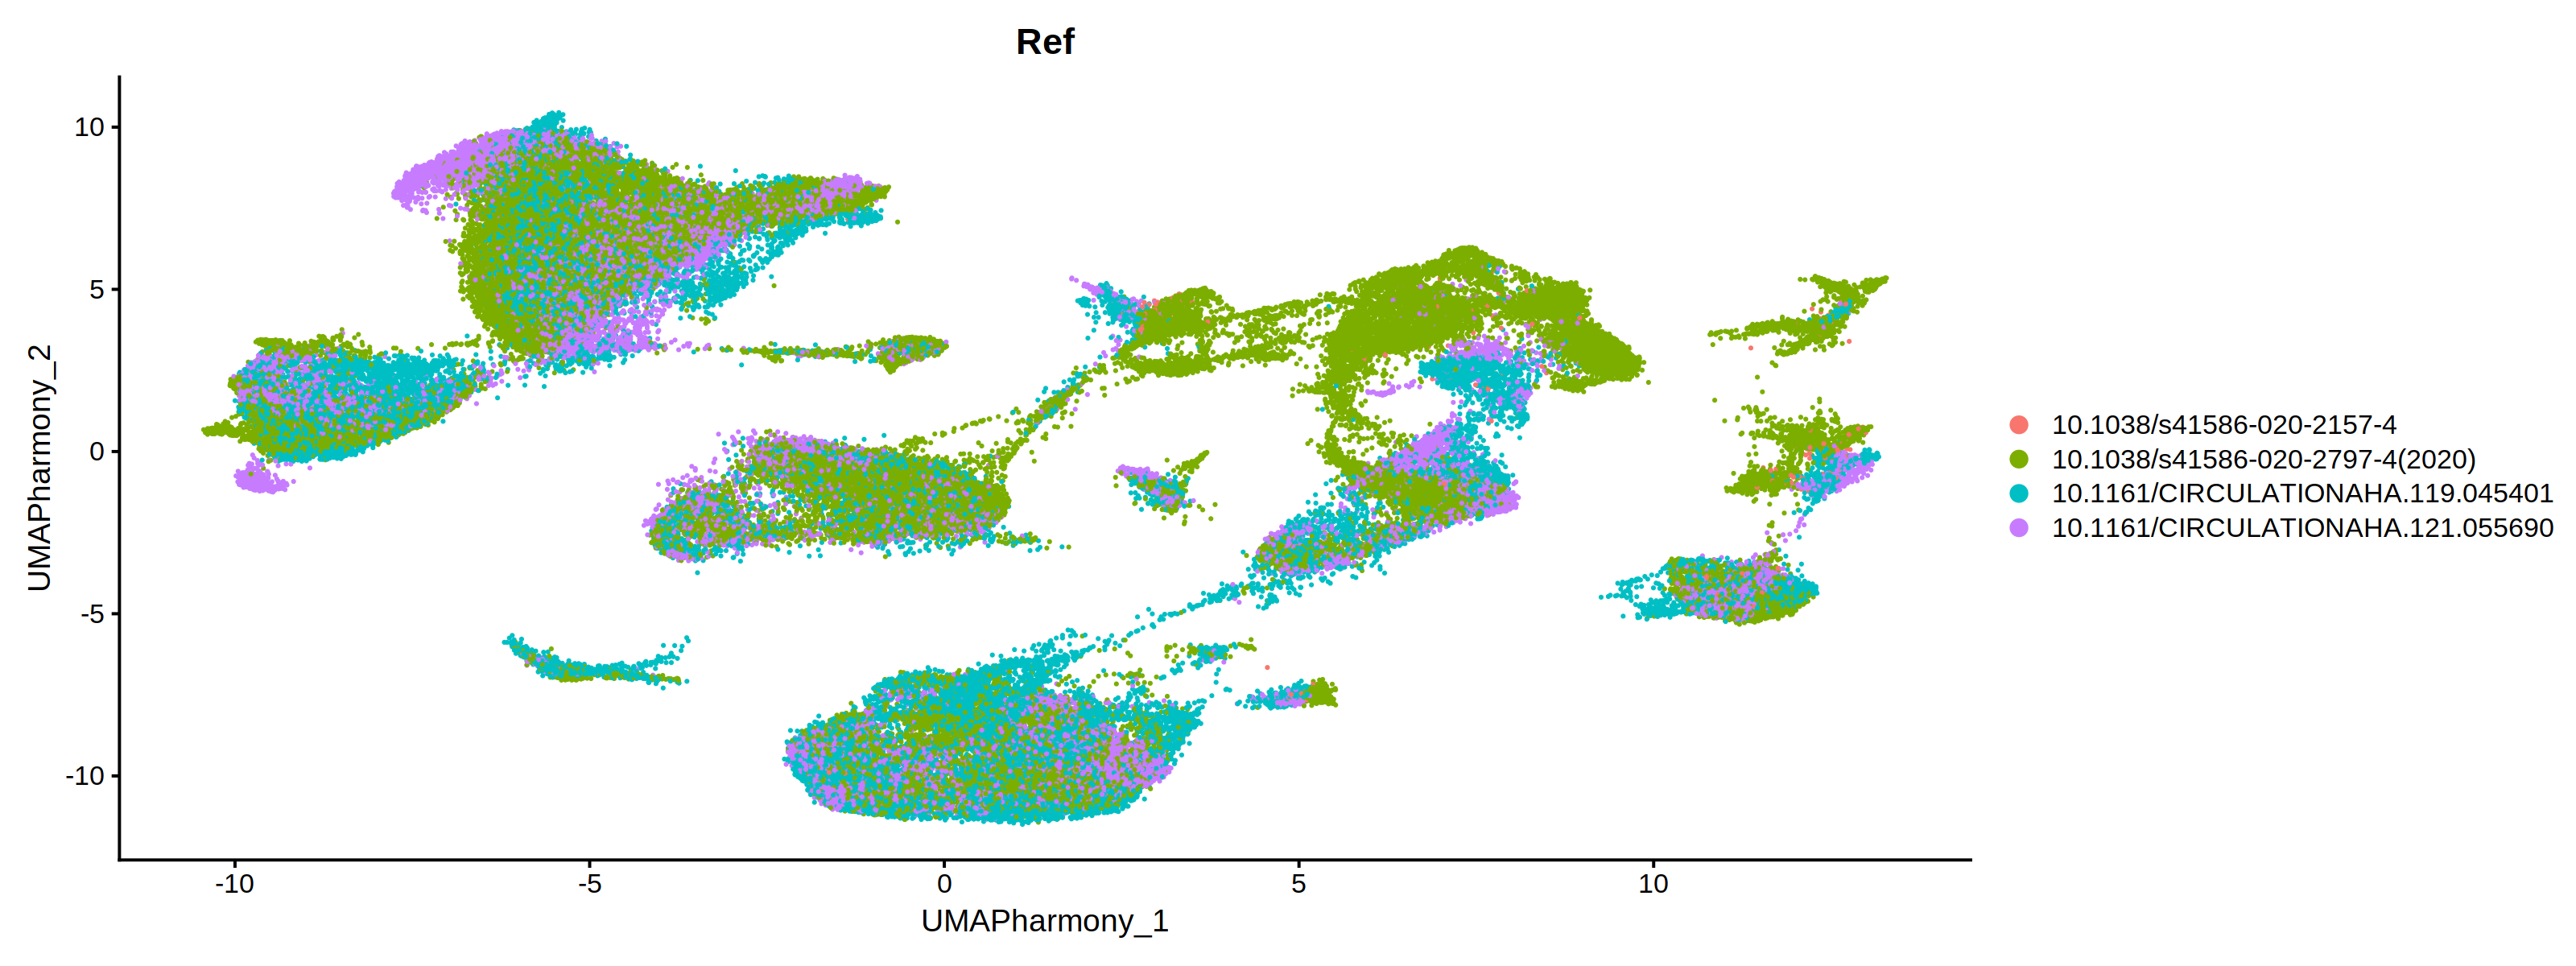

In [31]:
options(repr.plot.width=16, repr.plot.height=6, repr.plot.res = 200)
p <- DimPlot(dataobj,reduction= "umap", group.by="Ref",pt.size = 0.1)
p
ggsave("harmony.batch.png",width = 10, height = 6, dpi = 300)

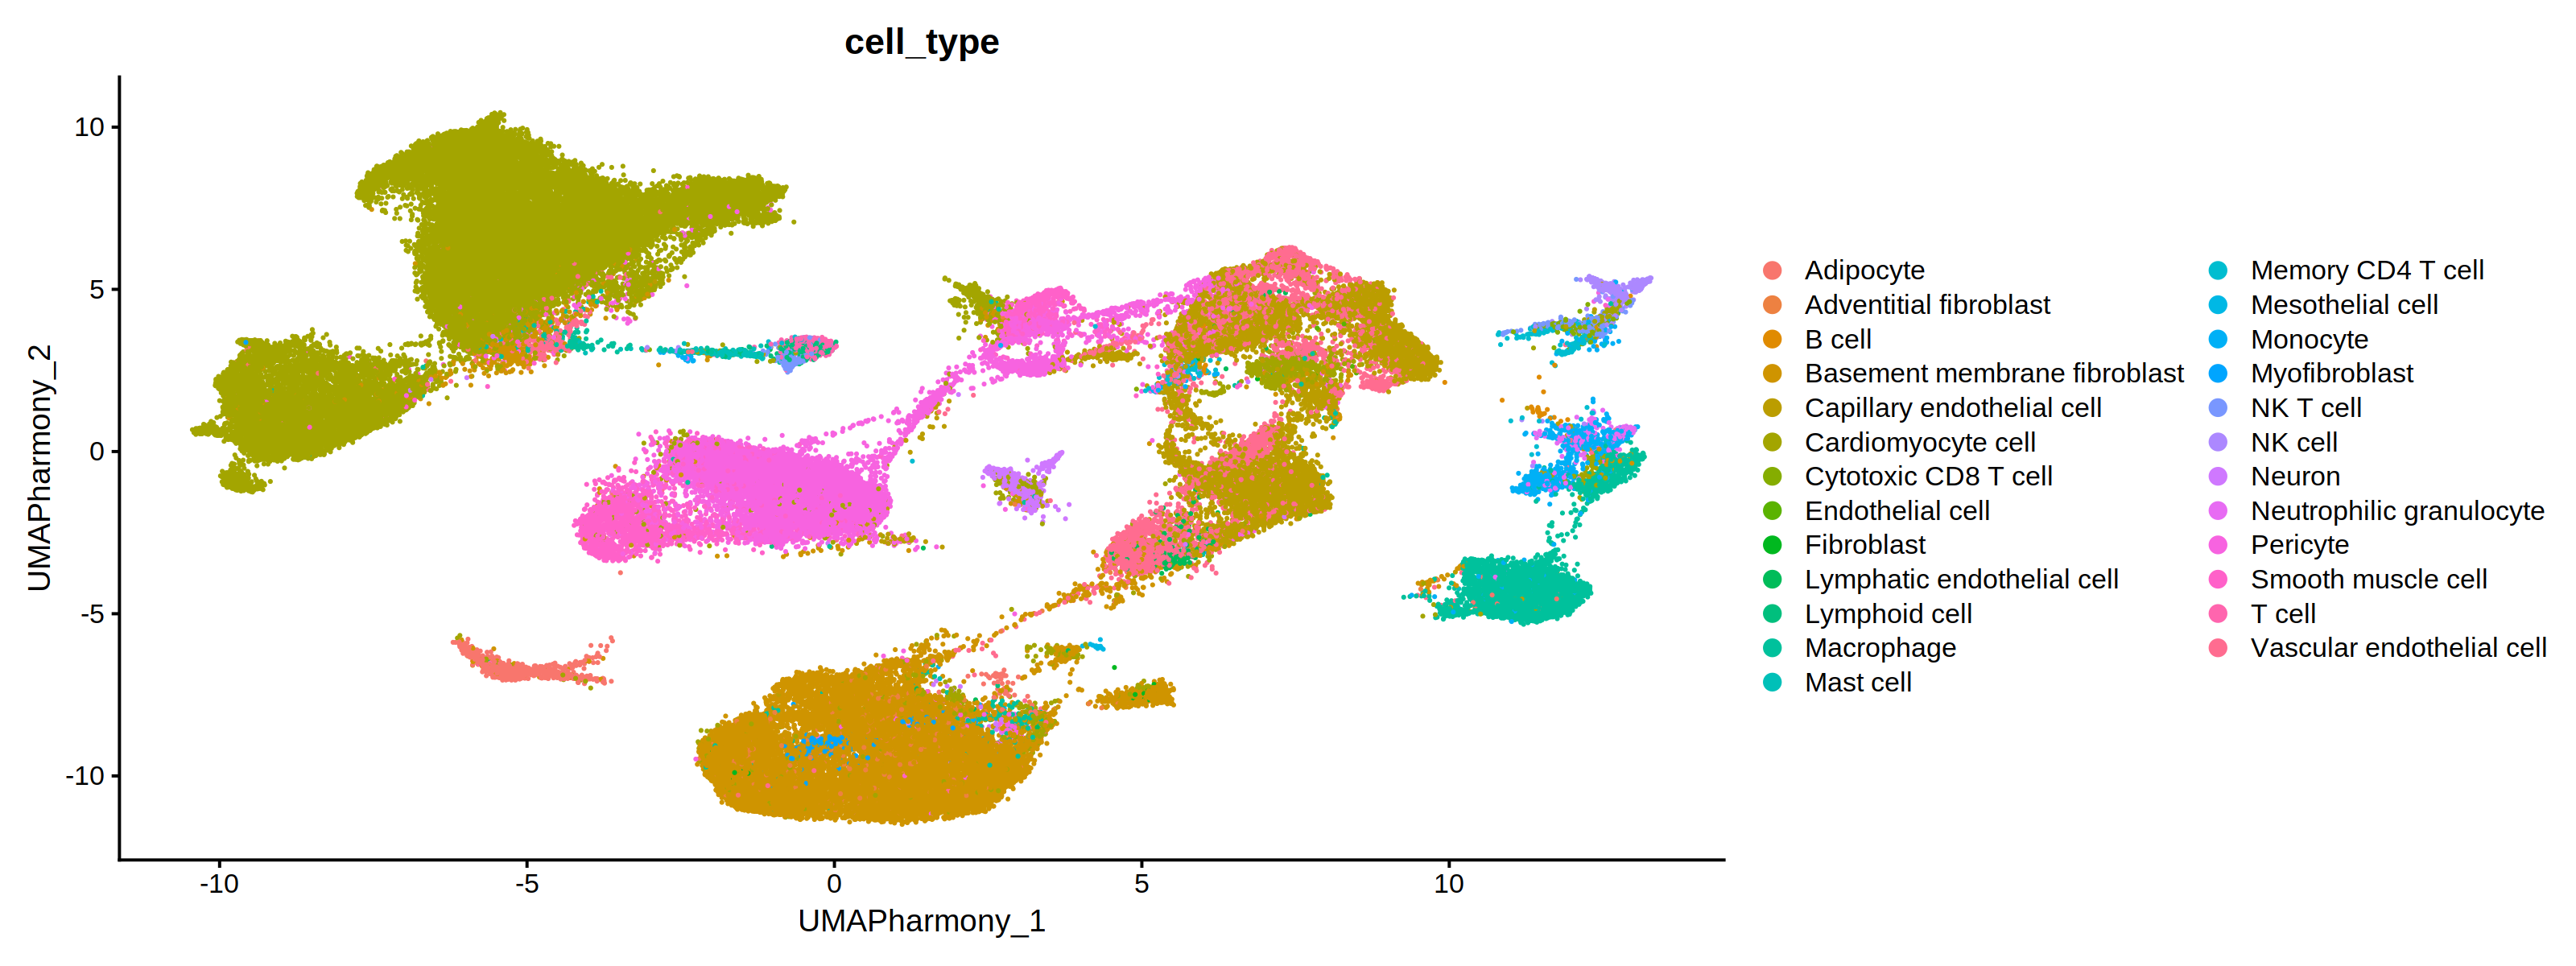

In [32]:
p <- DimPlot(dataobj,reduction= "umap", group.by="cell_type",pt.size = 0.1)
p
ggsave("harmony.celltype.png",width = 10, height = 6, dpi = 300)

In [34]:
write.csv(Embeddings(dataobj,reduction = "umap"),"harmony.UMAP.csv")

In [35]:
saveRDS(dataobj,"sampled.harmony.rds")

# 2. MNN

In [38]:
library(SeuratWrappers)

In [40]:
start.time <- Sys.time()

dataobj <- RunFastMNN(object.list = SplitObject(dataobj, split.by = "Ref"))

Sys.time() - start.time

Computing 2000 integration features

Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from mnn.reconstructed_ to mnnreconstructed_”


Time difference of 3.848539 mins

## Visualization

In [41]:
dataobj <- RunUMAP(dataobj,reduction="mnn",dims=1:40)

18:16:25 UMAP embedding parameters a = 0.9922 b = 1.112

18:16:25 Read 99567 rows and found 40 numeric columns

18:16:25 Using Annoy for neighbor search, n_neighbors = 30

18:16:25 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

18:16:36 Writing NN index file to temp file /tmp/RtmpTTf9x0/file15efe54a0b5176

18:16:36 Searching Annoy index using 1 thread, search_k = 3000

18:17:12 Annoy recall = 100%

18:17:13 Commencing smooth kNN distance calibration using 1 thread

18:17:19 Initializing from normalized Laplacian + noise

18:17:27 Commencing optimization for 200 epochs, with 4917314 positive edges

18:18:22 Optimization finished



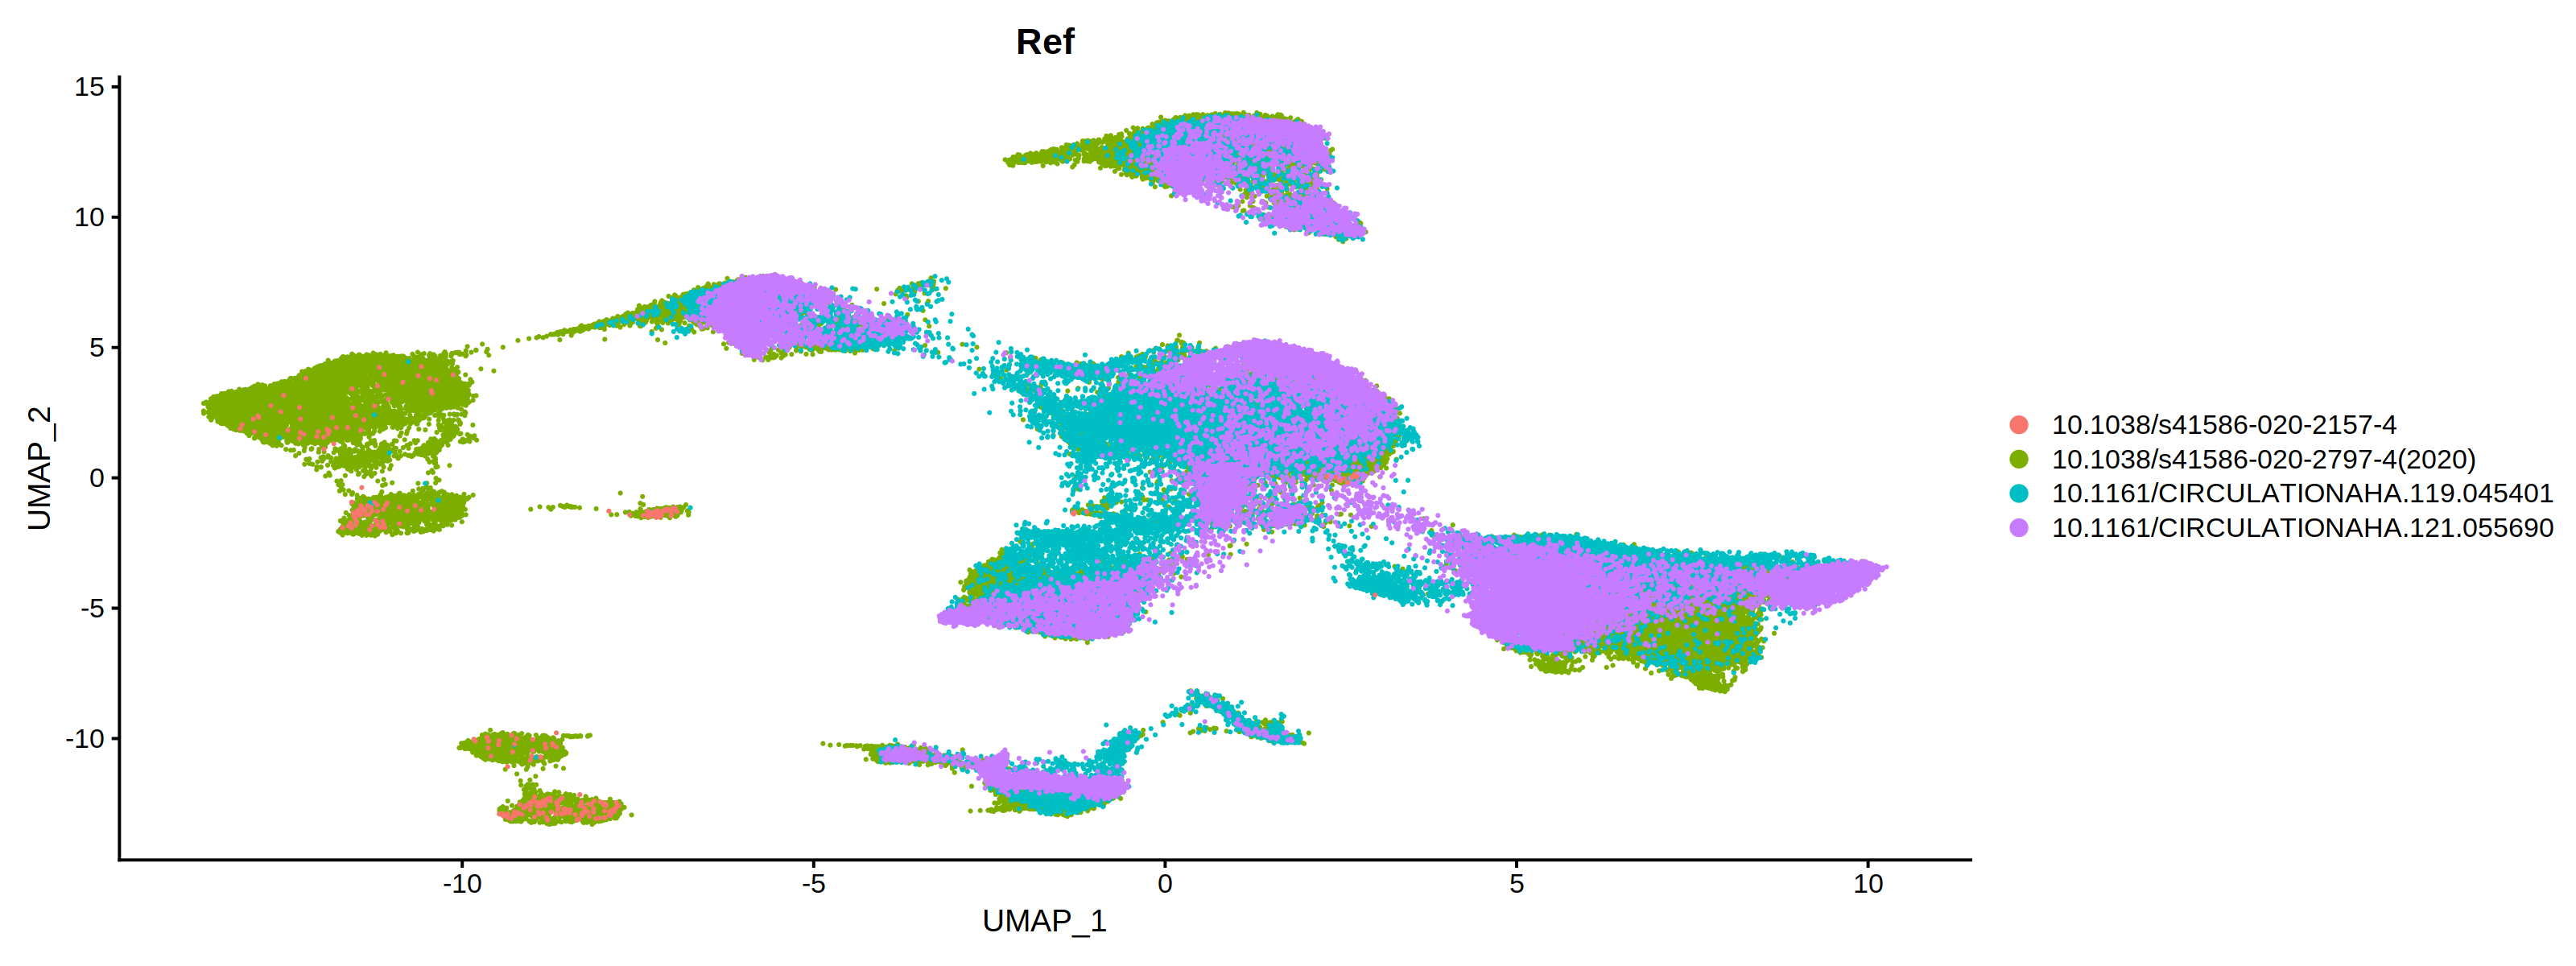

In [42]:
options(repr.plot.width=16, repr.plot.height=6, repr.plot.res = 200)
p <- DimPlot(dataobj,reduction= "umap", group.by="Ref",pt.size = 0.1)
p
ggsave("mnn.batch.png",width = 10, height = 6, dpi = 300)

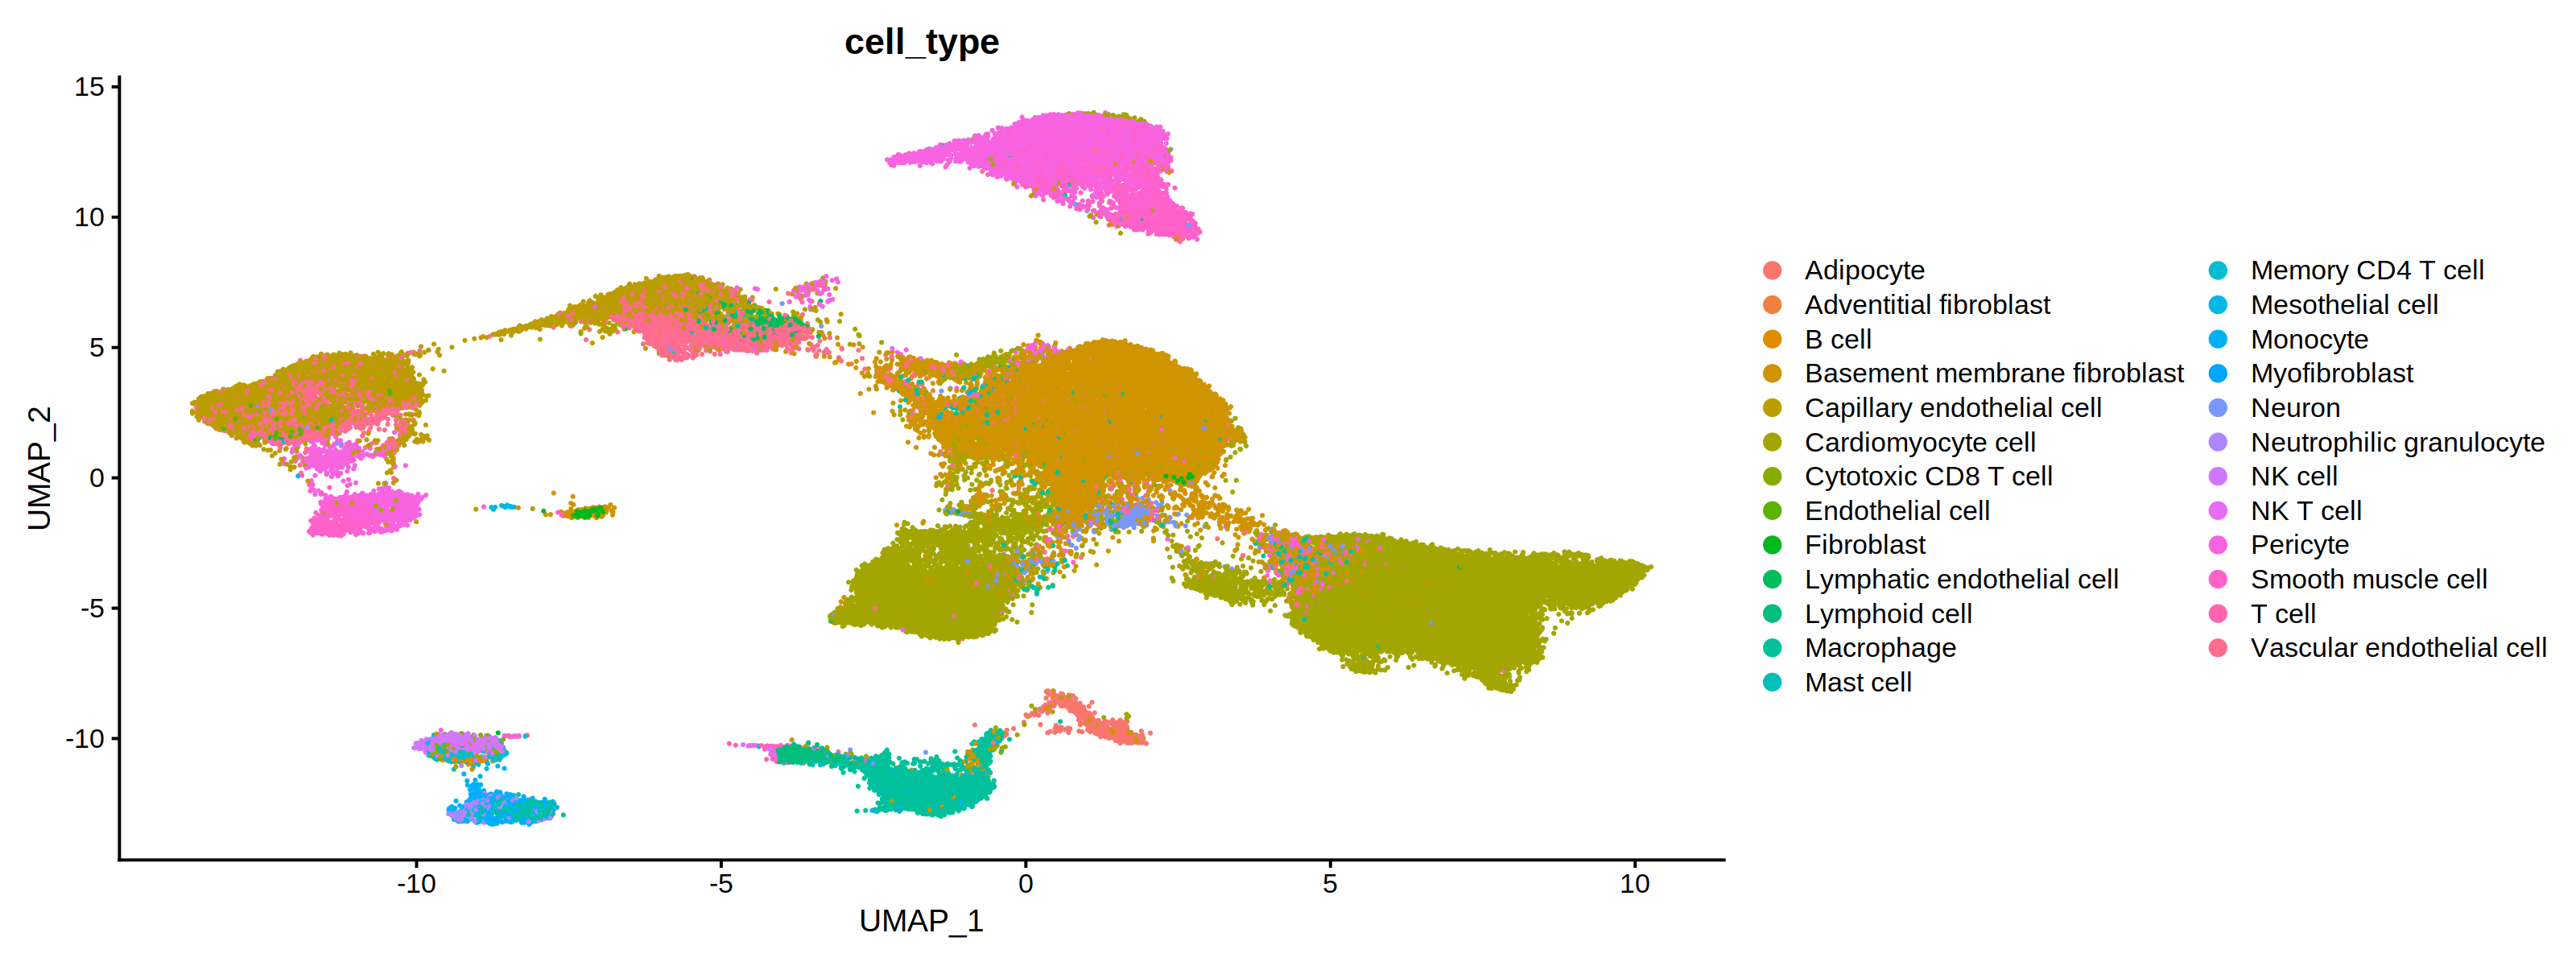

In [43]:
p <- DimPlot(dataobj,reduction= "umap", group.by="cell_type",pt.size = 0.1)
p
ggsave("mnn.celltype.png",width = 10, height = 6, dpi = 300)

In [44]:
write.csv(Embeddings(dataobj,reduction = "umap"),"mnn.UMAP.csv")

In [45]:
saveRDS(dataobj,"sampled.mnn.rds")

# 3. Seurat

In [48]:
obj.list <- SplitObject(dataobj,split.by = "Ref")

In [49]:
features <- SelectIntegrationFeatures(object.list = obj.list)
organ.list <- lapply(X = obj.list, FUN = function(x) {
    x <- ScaleData(x, features = features, verbose = FALSE)
    x <- RunPCA(x, features = features, verbose = FALSE)
})
obj.list <- organ.list

No variable features found for object1 in the object.list. Running FindVariableFeatures ...

No variable features found for object2 in the object.list. Running FindVariableFeatures ...

No variable features found for object3 in the object.list. Running FindVariableFeatures ...

No variable features found for object4 in the object.list. Running FindVariableFeatures ...



In [52]:
anchors <- FindIntegrationAnchors(object.list = obj.list, anchor.features = features, reduction = "rpca",k.anchor = 20)

Scaling features for provided objects

Computing within dataset neighborhoods

Finding all pairwise anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 27509 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 23918 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 20865 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 2290 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 1574 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 1464 anchors



In [53]:
obj.int <- IntegrateData(anchorset = anchors)

Merging dataset 4 into 1

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Merging dataset 3 into 1 4

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Merging dataset 2 into 1 4 3

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data



In [54]:
DefaultAssay(obj.int) <- "integrated"

In [55]:
obj.int <- FindVariableFeatures(obj.int)
obj.int <- ScaleData(obj.int)
obj.int <- RunPCA(obj.int)

Warning message in FindVariableFeatures.Assay(object = assay.data, selection.method = selection.method, :
“selection.method set to 'vst' but count slot is empty; will use data slot instead”
Warning message in eval(predvars, data, env):
“NaNs produced”
Warning message in hvf.info$variance.expected[not.const] <- 10^fit$fitted:
“number of items to replace is not a multiple of replacement length”
Centering and scaling data matrix

PC_ 1 
Positive:  SOX5, ABCA8, NEGR1, ADGRB3, ANKRD1, ABCA6, EBF1, CARMIL1, KAZN, ABCA9 
	   BICC1, PDE1A, MAPK10, CDH19, GRK5, FOXP2, RAPH1, PID1, ACSM3, UNC5C 
	   SPATA6, ABCA10, DCN, DISC1, EBF2, ADAMTSL3, COL5A2, GLIS3, TRPS1, SETBP1 
Negative:  RPL18A, RPL39, RPL9, RPS27, RPS18, TMSB10, RPS28, RPL3, RPS15A, FKBP1A 
	   RPL32, RPL34, RPL21, RPS19, IFITM2, RPS3A, RPS15, PTMA, RPL12, RPL19 
	   EEF1A1, RPS27A, RPL36, RPS14, TMSB4X, RPL35A, RPL28, RPS13, FAU, RPS6 
PC_ 2 
Positive:  ANKRD1, HSPB7, NRAP, HSPB3, TCAP, FABP3, CSRP3, TYROBP, CKM, STYXL2 
	   FCER1G

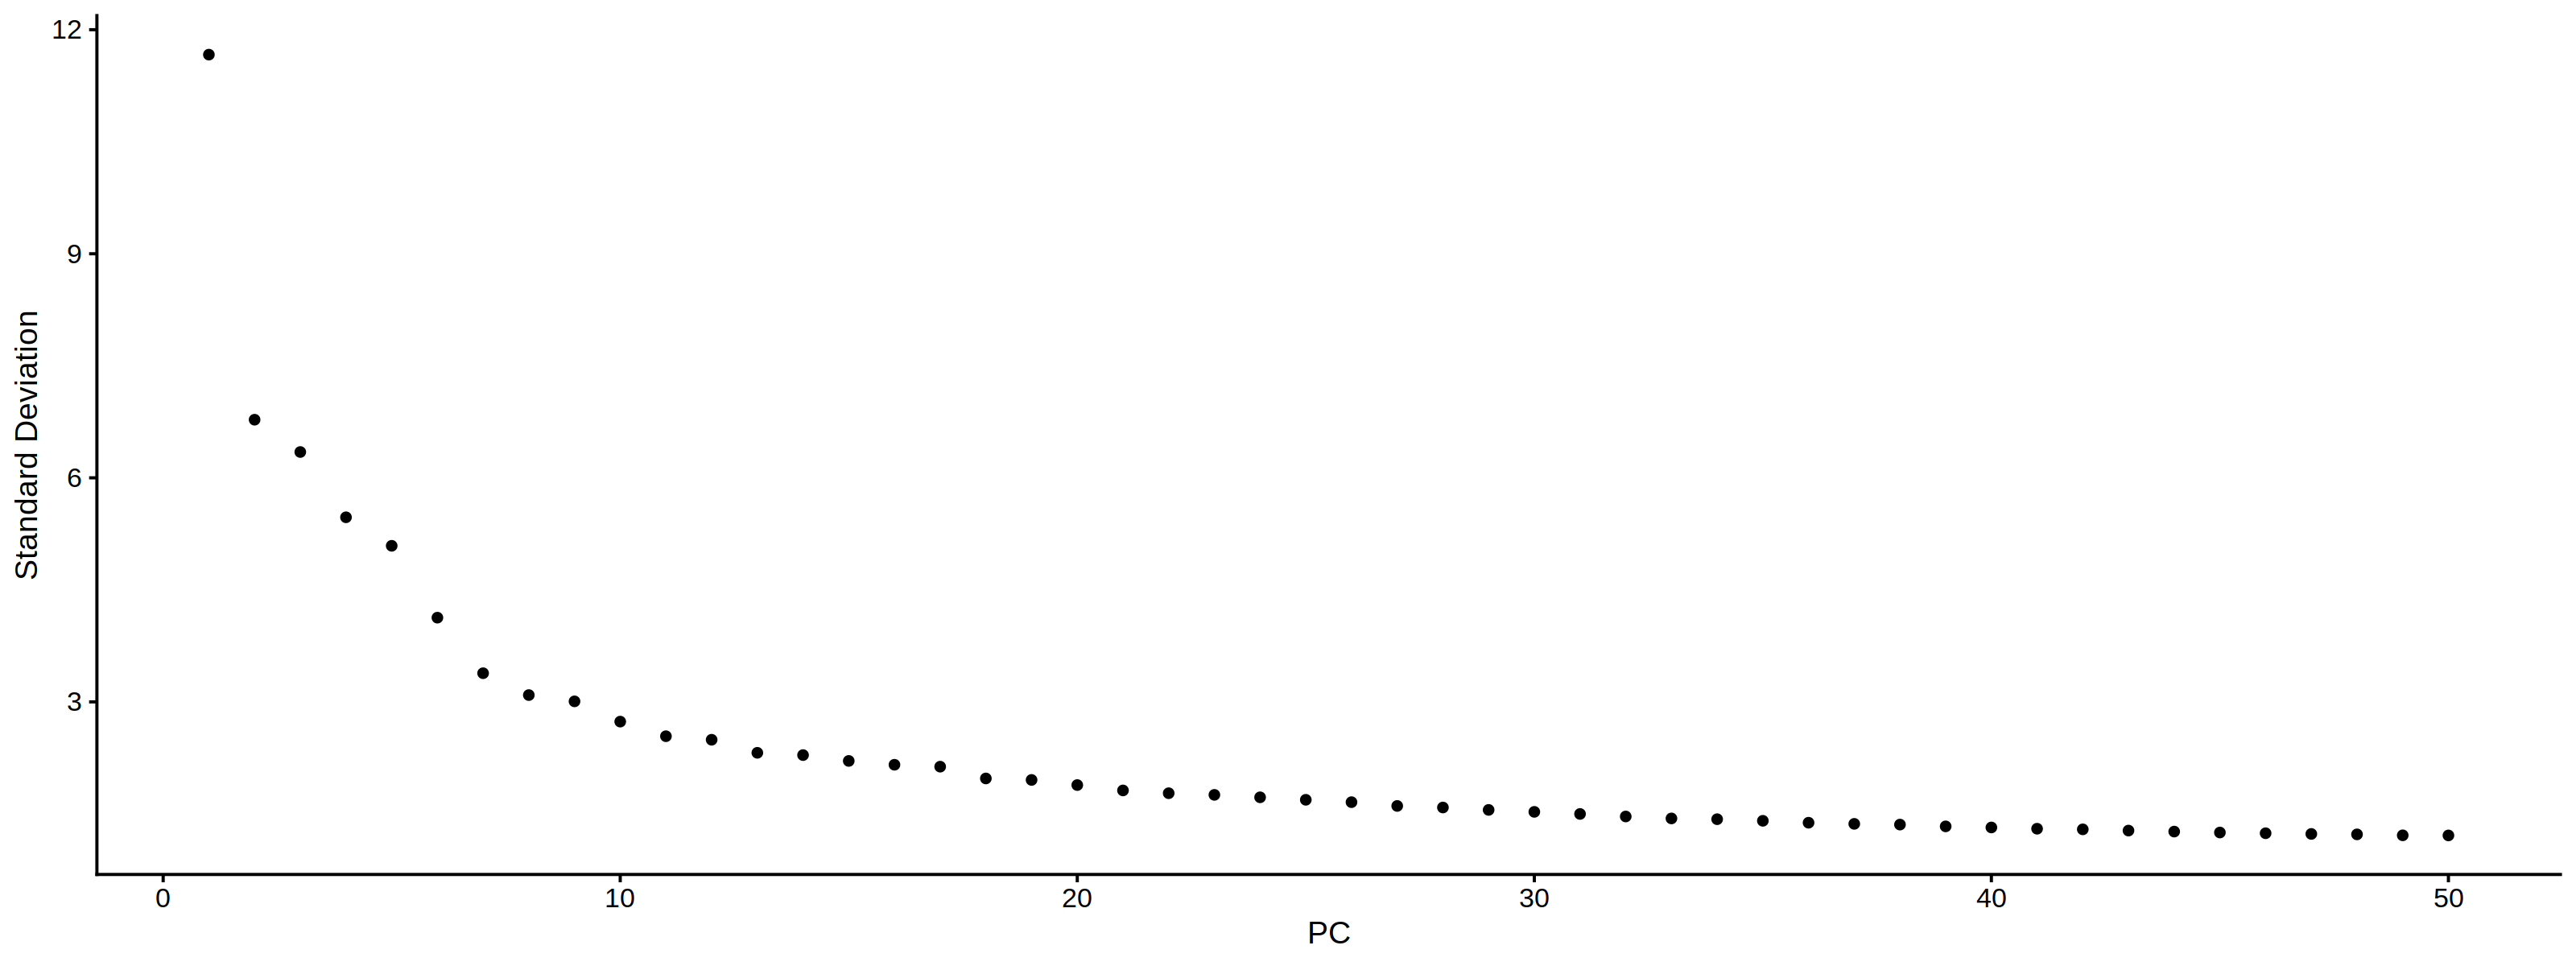

In [56]:
ElbowPlot(obj.int, ndims = 50)

In [57]:
obj.int <- RunUMAP(obj.int,dims = 1:20)

16:13:18 UMAP embedding parameters a = 0.9922 b = 1.112

16:13:18 Read 99567 rows and found 20 numeric columns

16:13:18 Using Annoy for neighbor search, n_neighbors = 30

16:13:18 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

16:13:28 Writing NN index file to temp file /tmp/RtmpTTf9x0/file15efe54f1578fd

16:13:28 Searching Annoy index using 1 thread, search_k = 3000

16:14:02 Annoy recall = 100%

16:14:03 Commencing smooth kNN distance calibration using 1 thread

16:14:08 Initializing from normalized Laplacian + noise

16:14:23 Commencing optimization for 200 epochs, with 4576252 positive edges

16:15:13 Optimization finished



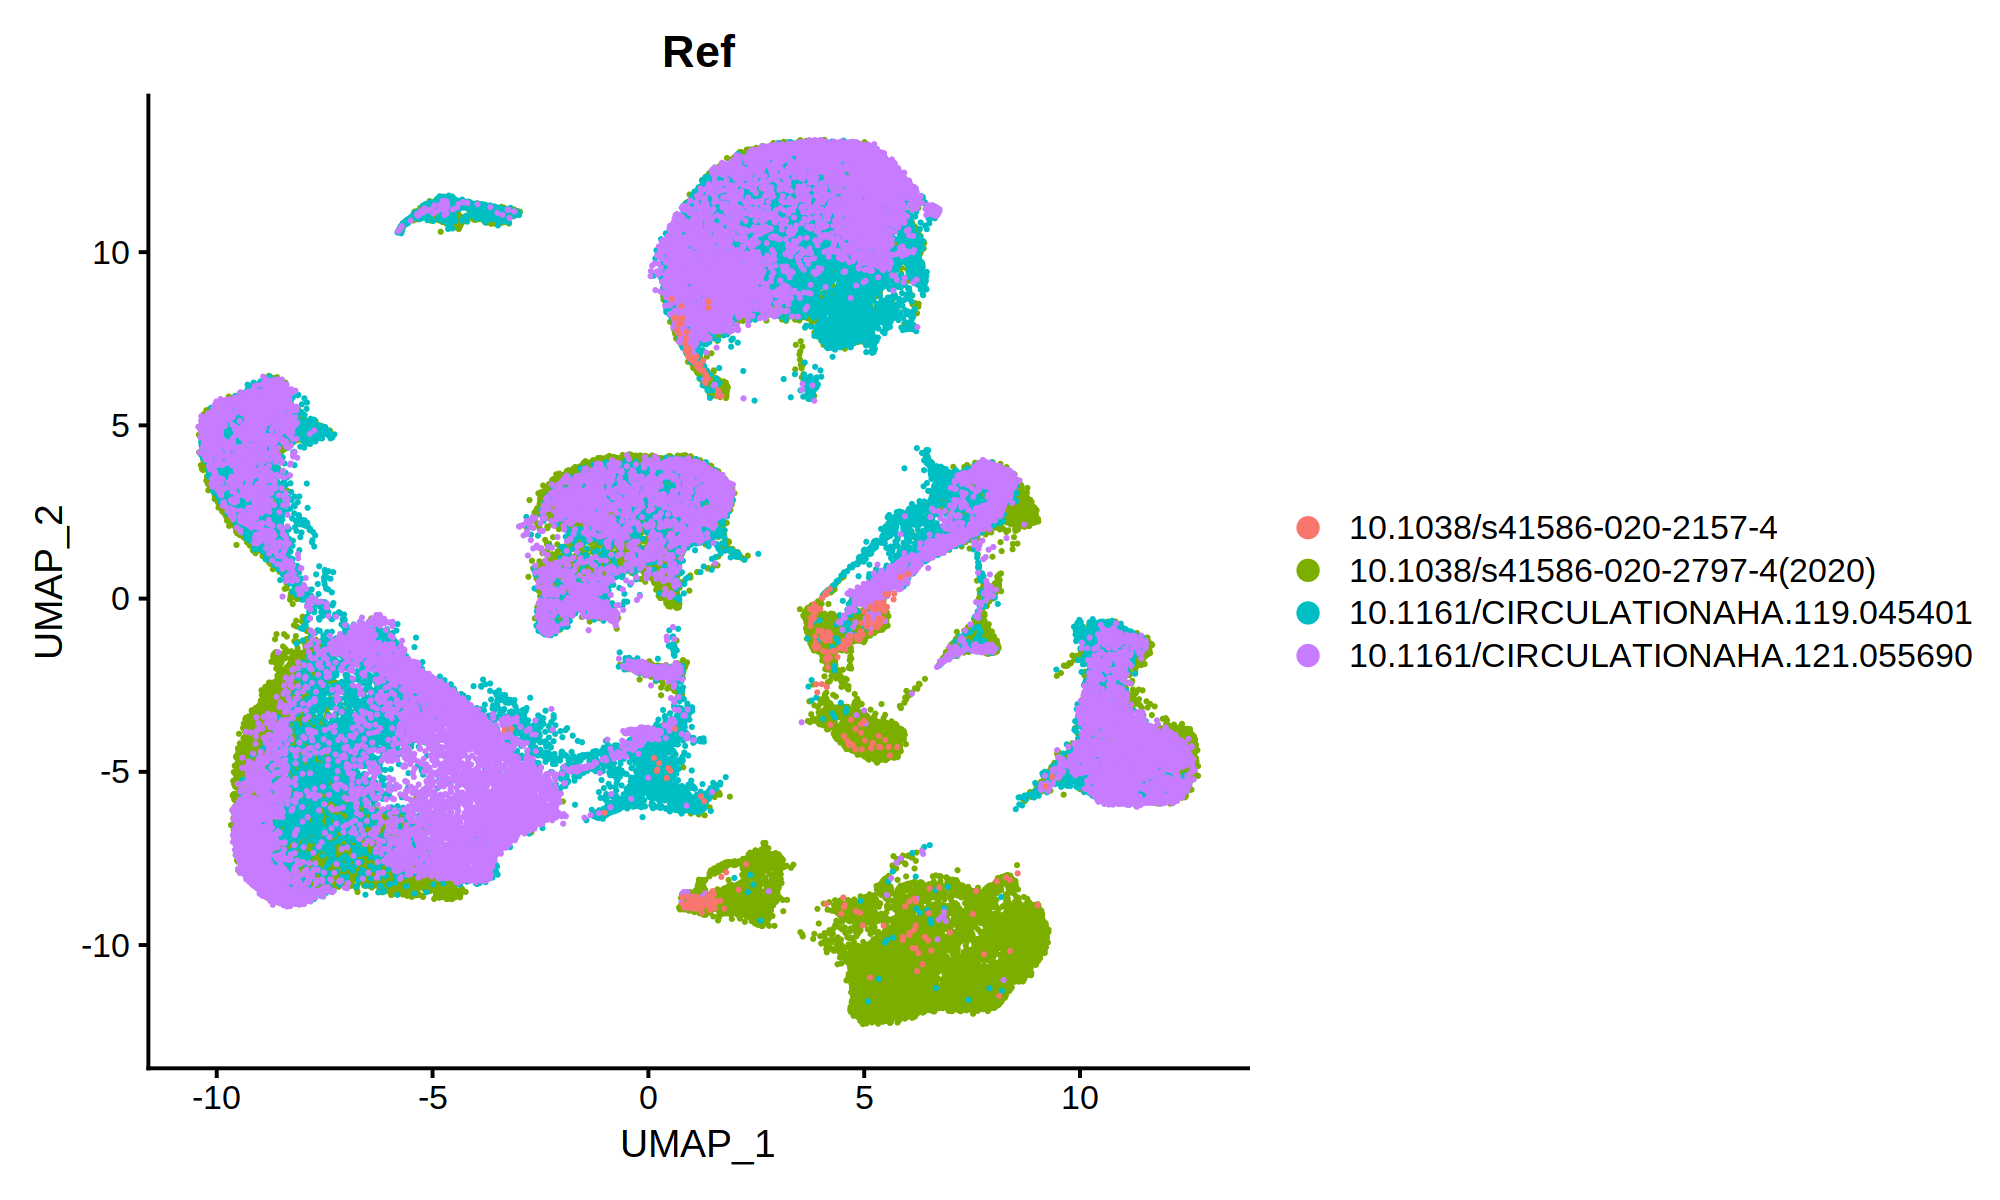

In [59]:
options(repr.plot.width=10, repr.plot.height=6, repr.plot.res = 200)
p <- DimPlot(obj.int,reduction= "umap", group.by="Ref",pt.size = 0.1)
p
ggsave("seurat.batch.png",width = 10, height = 6, dpi = 300)

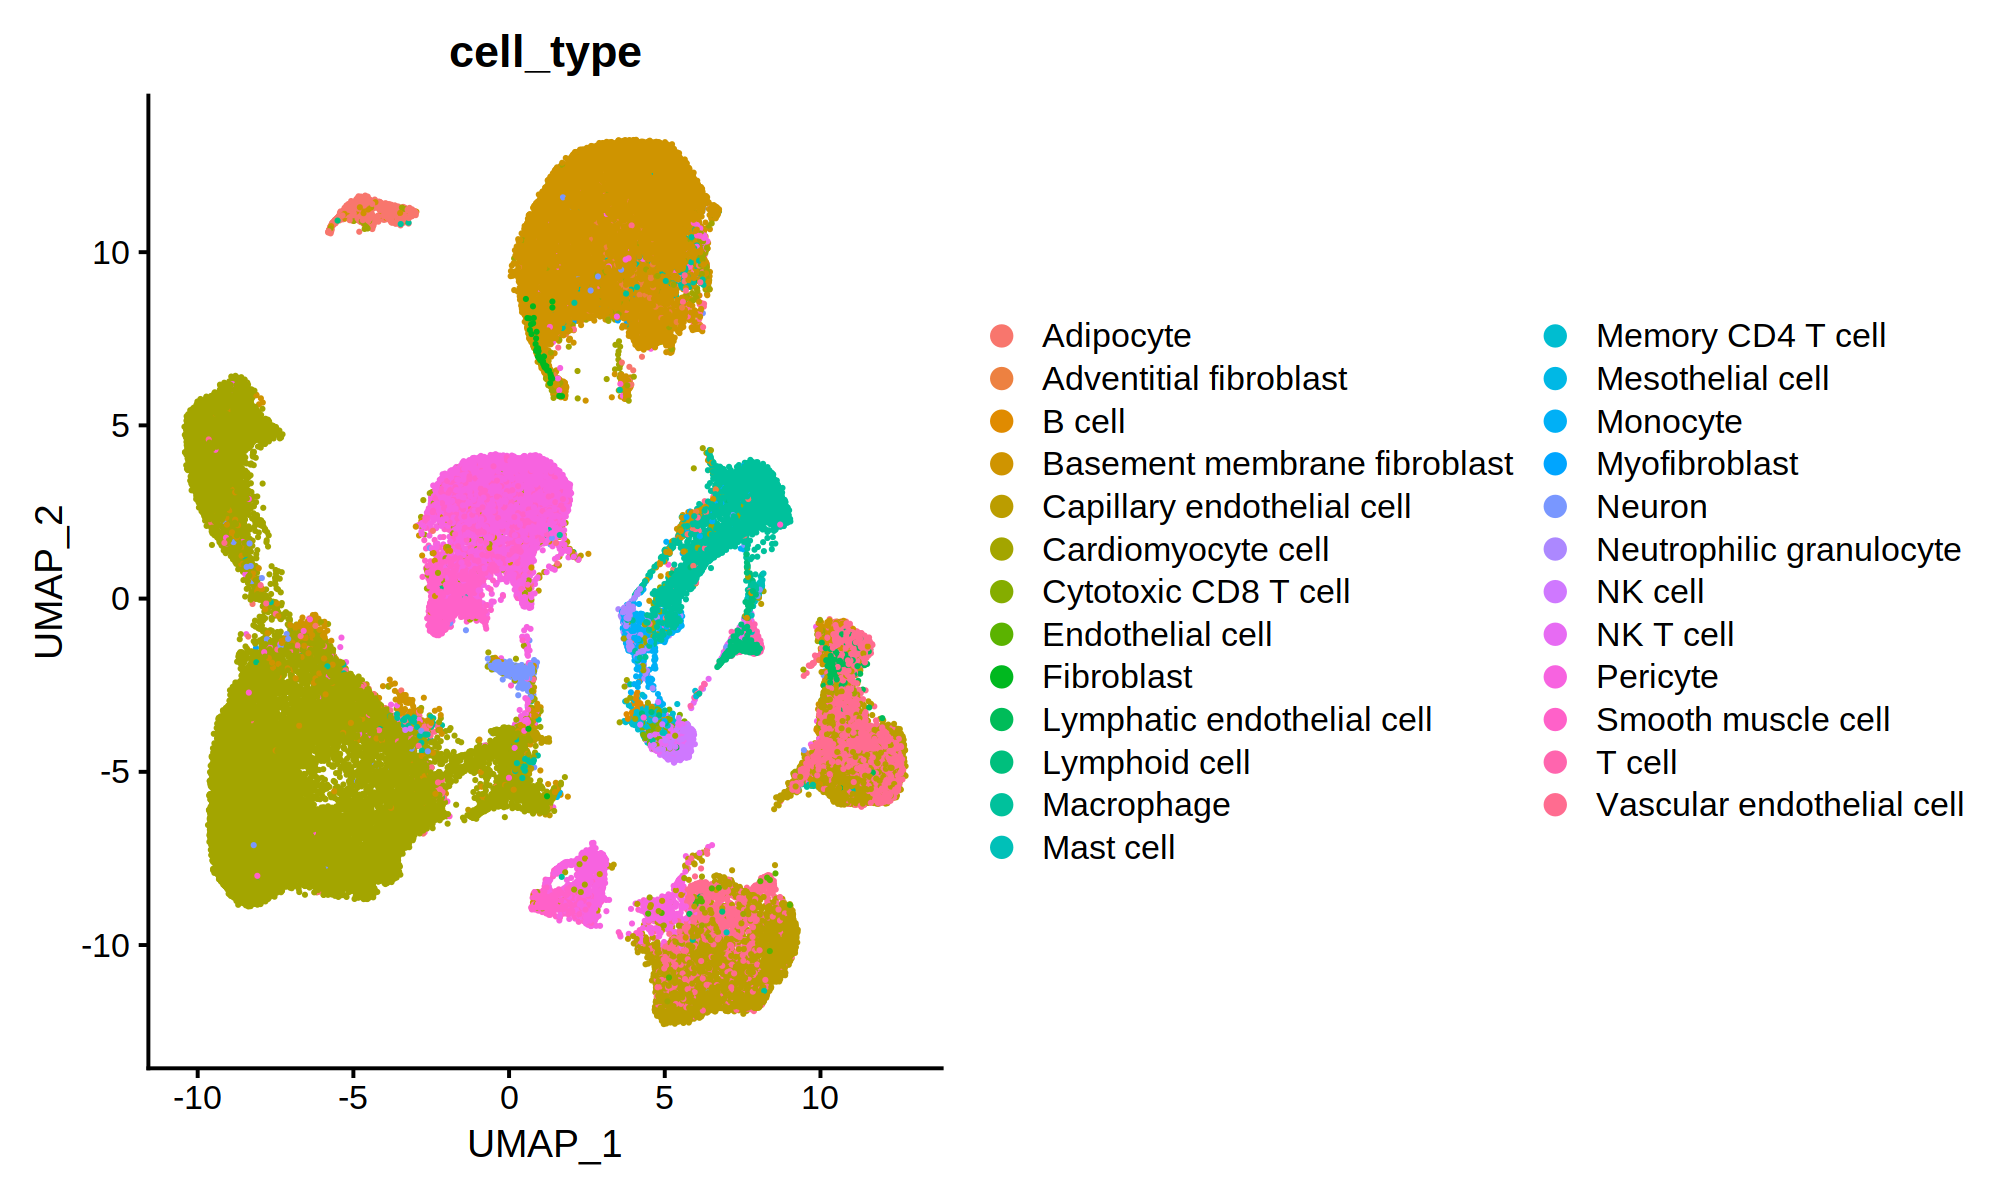

In [60]:
p <- DimPlot(obj.int,reduction= "umap", group.by="cell_type",pt.size = 0.1)
p
ggsave("seurat.celltype.png",width = 10, height = 6, dpi = 300)

In [62]:
saveRDS(obj.int,"sampled.seurat.rds")